# Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler

# Read the cleaned data

In [2]:
df = pd.read_csv('secom_clean.csv')
X, y = df.drop('target', axis=1), df['target']

# Robust Scaling

In [3]:
# Handling high-frequency sensor outliers
X_scaled = StandardScaler().fit_transform(X)

# PCA Manifold Learning

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA 2D Projection

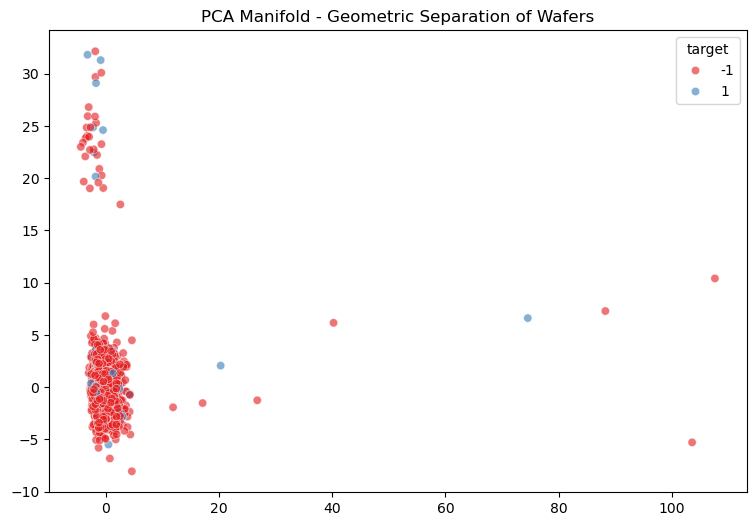

In [5]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.6)
plt.title("PCA Manifold - Geometric Separation of Wafers")
plt.show()

# Correlation Heatmap

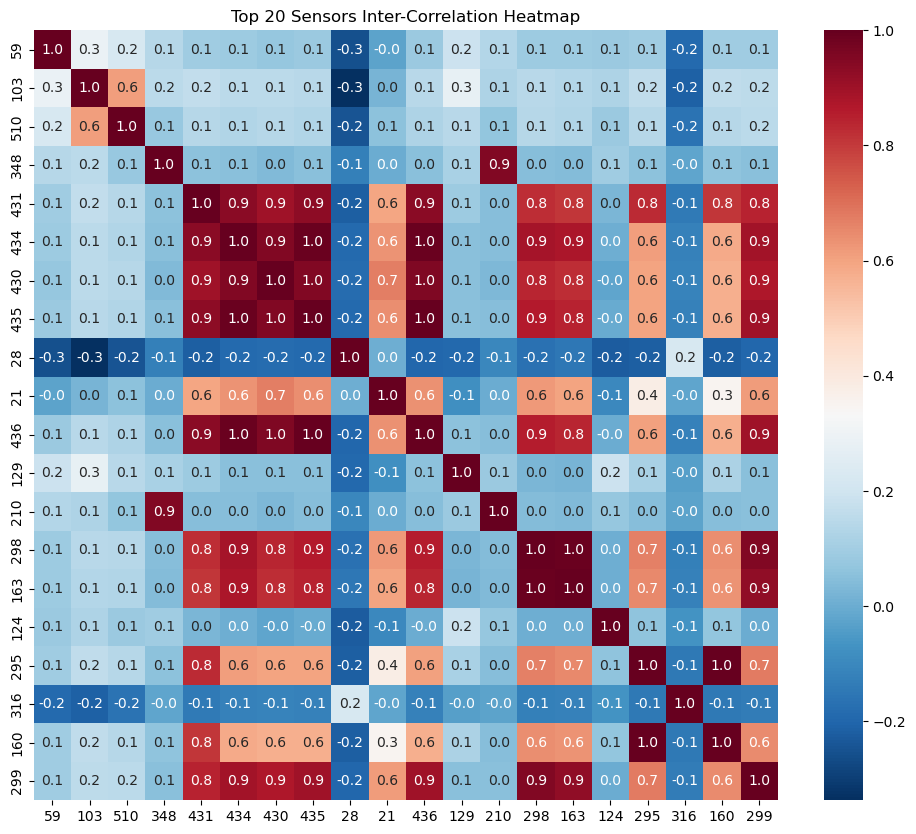

In [6]:
top_20 = X.corrwith(y).abs().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 10))
sns.heatmap(X[top_20].corr(), annot=True, cmap='RdBu_r', fmt=".1f")
plt.title("Top 20 Sensors Inter-Correlation Heatmap")
plt.show()

# Statistical Drift (violin plots)

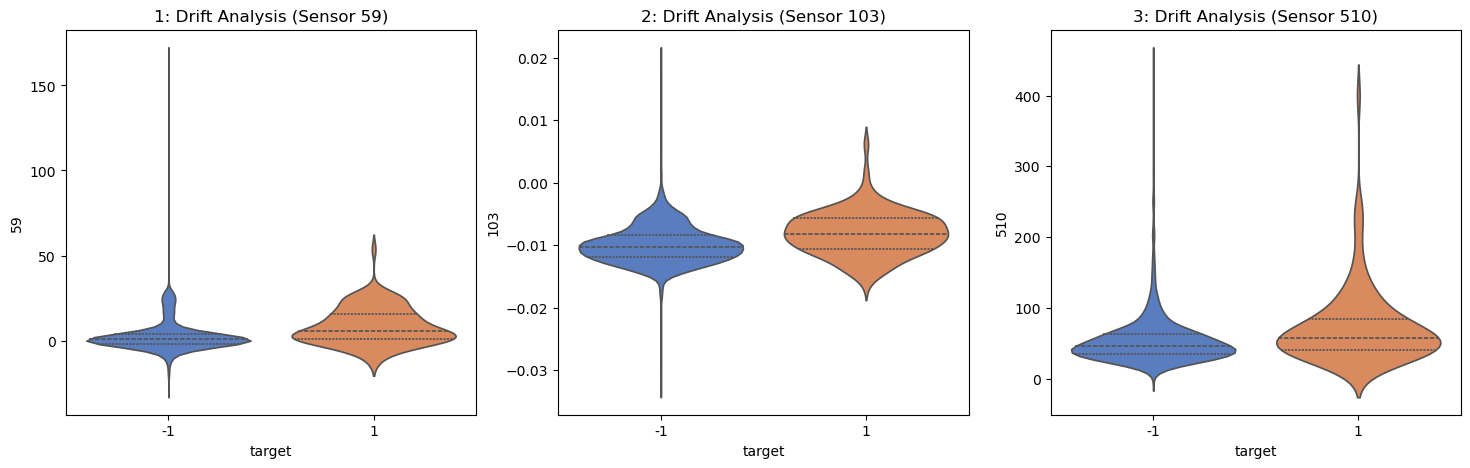

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, sensor in enumerate(top_20[:3]):
    sns.violinplot(x=y, y=X[sensor], hue=y, ax=axes[i], inner="quart", palette="muted", legend=False)
    axes[i].set_title(f"{i+1}: Drift Analysis (Sensor {sensor})")
plt.show()